In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [3]:
energy_consumption_data_train.describe()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
count,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000
mean,0.209474,0.256724,0.519871,0.002143,0.210094,0.296840,0.478336,0.002377,0.179473,0.301408,0.498679,0.003928,0.185218,0.300868,0.488912,0.001308,2.470590,6.410979,42417.146181
std,0.110811,0.383131,0.140546,0.014191,0.096493,0.403578,0.164914,0.016449,0.103081,0.411494,0.167612,0.022552,0.100441,0.407535,0.164314,0.009922,1.117573,3.437434,12562.485658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2550.000000
25%,0.123711,0.000000,0.413919,0.000000,0.143617,0.000000,0.350394,0.000000,0.111111,0.000000,0.367589,0.000000,0.111801,0.000000,0.361277,0.000000,1.000000,3.000000,34337.375000
50%,0.195876,0.000000,0.509158,0.000000,0.202128,0.000000,0.462598,0.000000,0.154321,0.000000,0.490119,0.000000,0.167702,0.000000,0.479042,0.000000,2.000000,6.000000,43305.500000
75%,0.278351,0.516667,0.620879,0.000000,0.265957,0.683333,0.600394,0.000000,0.222222,0.716667,0.620553,0.000000,0.236025,0.700000,0.606786,0.000000,3.000000,9.000000,51314.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,76049.000000


In [4]:
energy_consumption_data_test.describe()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
count,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.00000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.00000,10124.000000,10124.000000
mean,0.197644,0.272124,0.544653,0.002114,0.208456,0.30631,0.504652,0.002484,0.164709,0.341158,0.521827,0.003568,0.170357,0.332777,0.515113,0.001397,2.76047,7.329909,37376.127272
std,0.108223,0.388196,0.141543,0.014188,0.101656,0.40491,0.165646,0.018770,0.094119,0.425652,0.165973,0.028306,0.092966,0.419298,0.164402,0.012031,1.05336,3.238977,12920.453917
min,0.000000,0.000000,0.113553,0.000000,0.000000,0.00000,0.029528,0.000000,0.012346,0.000000,0.077075,0.000000,0.012422,0.000000,0.035928,0.000000,1.00000,1.000000,3143.250000
25%,0.118557,0.000000,0.437729,0.000000,0.138298,0.00000,0.375984,0.000000,0.098765,0.000000,0.385375,0.000000,0.105590,0.000000,0.381238,0.000000,2.00000,5.000000,28632.250000
50%,0.180412,0.000000,0.545788,0.000000,0.196809,0.00000,0.505906,0.000000,0.141975,0.000000,0.529644,0.000000,0.155280,0.000000,0.520958,0.000000,3.00000,8.000000,38095.250000
75%,0.257732,0.583333,0.644689,0.000000,0.260638,0.70000,0.624016,0.000000,0.203704,0.866667,0.646245,0.000000,0.217391,0.816667,0.636727,0.000000,4.00000,10.000000,46672.250000
max,0.871134,1.000000,1.032967,0.522293,0.936170,1.00000,1.011811,0.826087,0.728395,1.000000,0.986166,1.388889,0.913043,1.000000,0.976048,0.786389,4.00000,12.000000,70869.250000


## Exploring the Data for Station 02014 ##

In [ ]:
# create a list of all columns that we are considering
features = ['Wind Velocity for Station 02014', 'Sun Duration for Station 02014', 'Air Temperature for Station 02014', 'Precipitation Amount for Station 02014']

# create a figure and specify its size
fig = plt.figure(figsize=(15,15))

# go through all combinations and create one plot for each
figure_index = 1
for column in energy_consumption_data_train.columns[:4]:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,2,figure_index)

    # normalizing
    scaler = MinMaxScaler()
    energy_consumption_data_train[[column, "Energy Consumption"]] = scaler.fit_transform(energy_consumption_data_train[[column, "Energy Consumption"]])
    
    # plot the feature combination
    axs.scatter(energy_consumption_data_train[column], energy_consumption_data_train["Energy Consumption"])
    
    # set the axis labels of the current sub plot
    axs.set_xlabel(column)
    axs.set_ylabel("Energy Consumption")
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

    
# show the plot
plt.show()

## Applying Decision Tree for Station 02014 ##

In [5]:
from sklearn.tree import DecisionTreeRegressor

# create and fit a linear regression
estimator = DecisionTreeRegressor()


In [6]:
energy_consumption_data_train.columns[:4]

Index(['Wind Velocity for Station 02014', 'Sun Duration for Station 02014',
       'Air Temperature for Station 02014',
       'Precipitation Amount for Station 02014'],
      dtype='object')

RMSE: 12448.920344338345
r-squared: 0.07156664843485971
RMSE: 13543.509939638188
r-squared: -0.0988788596090946
RMSE: 13207.151848992946
r-squared: -0.044974515517434144
RMSE: 13873.696299493147
r-squared: -0.15311261576948088


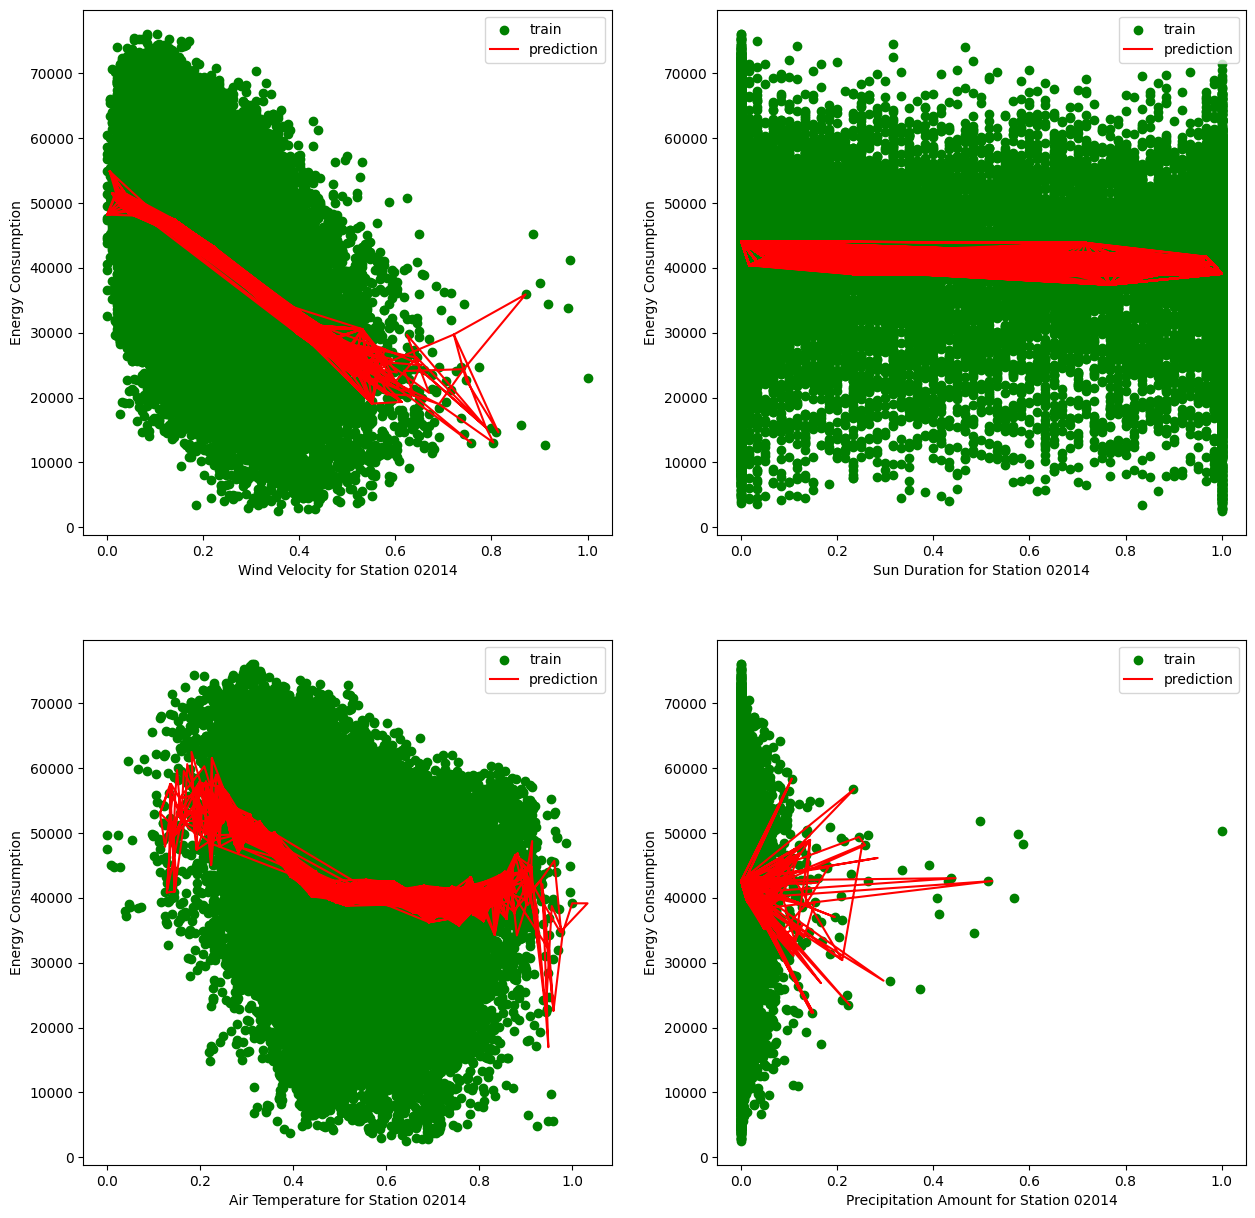

In [7]:
# reshaping target data to fit regressions requirements
features = energy_consumption_data_train["Energy Consumption"].values.reshape(-1, 1)

# create a figure and specify its size
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plotting regression
#figure_index = 1
for i, column in enumerate(energy_consumption_data_train.columns[0:4]):
    # Fit the linear regression model to the data
    X = energy_consumption_data_train[[column]]
    Y = energy_consumption_data_train["Energy Consumption"]
    estimator.fit(X, Y)

    #axs = fig.add_subplot(2,2,figure_index)
    ax = axs[i // 2, i % 2]

    # plot the original values
    ax.scatter(X, Y, c='green', label='train')


    X_TEST = energy_consumption_data_test[[column]]
    Y_PRED = estimator.predict(X_TEST)
    # plot the predicted values
    ax.plot(X_TEST, Y_PRED, c='red', label='prediction')

    ax.set_xlabel(column)
    ax.set_ylabel('Energy Consumption')
    ax.legend()

    Y_TEST = energy_consumption_data_test["Energy Consumption"]


    print("RMSE:", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
    print("r-squared:", r2_score(Y_TEST, Y_PRED))

    # increase the figure index (otherwise all plots are drawn in the first subplot)
    #figure_index+=1



# show the plot
plt.show()

Best Hyperparameters: {'regressor__max_depth': 5}
Best Score (MSE): 129330334.19265524
RMSE: 11372.349545835075
r-squared: 0.0732537161414123


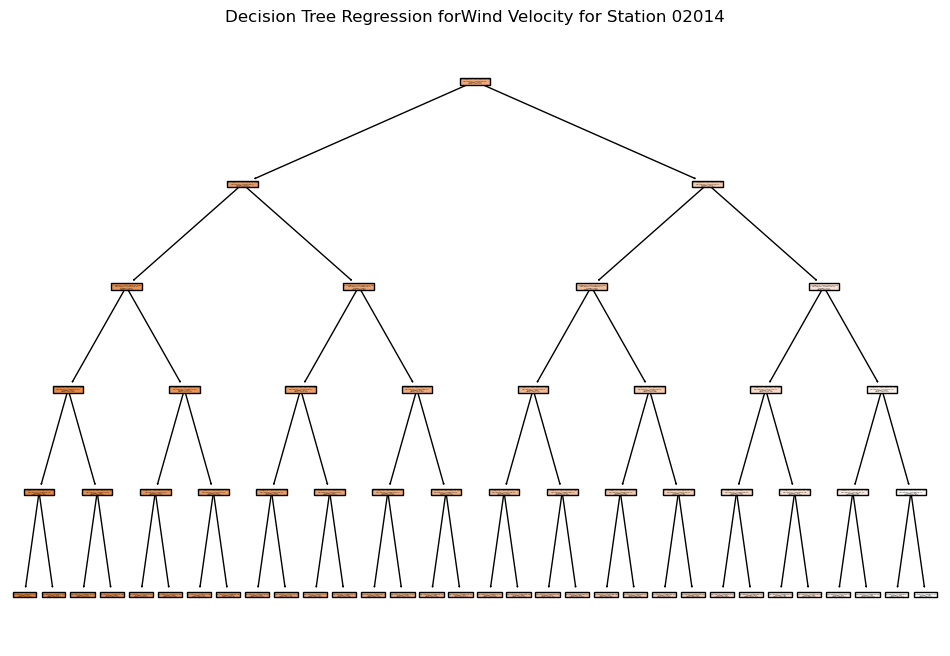

Best Hyperparameters: {'regressor__max_depth': 5}
Best Score (MSE): 160097367.07715553
RMSE: 12652.958826976224
r-squared: -0.09753607306785805


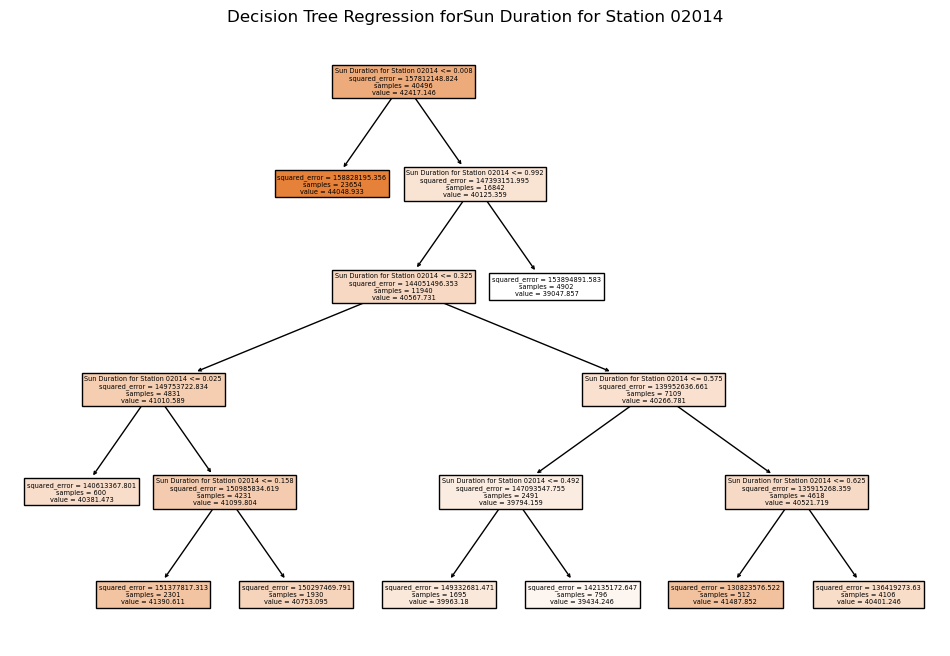

Best Hyperparameters: {'regressor__max_depth': 5}
Best Score (MSE): 154064266.08394825
RMSE: 12412.262730217575
r-squared: -0.03975367276001074


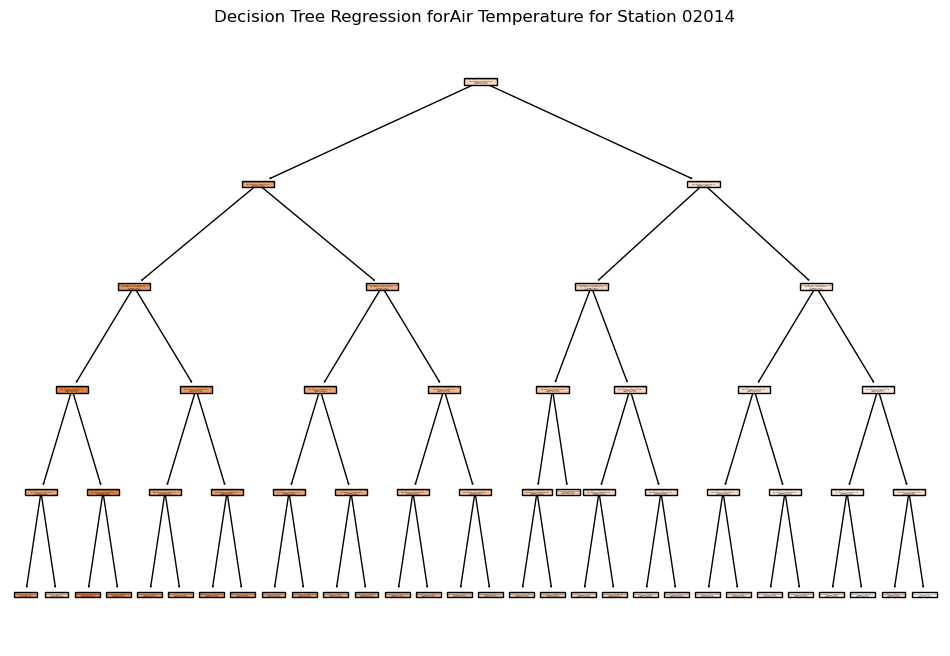

Best Hyperparameters: {'regressor__max_depth': 5}
Best Score (MSE): 163171974.39373812
RMSE: 12773.878596328452
r-squared: -0.15100541768286502


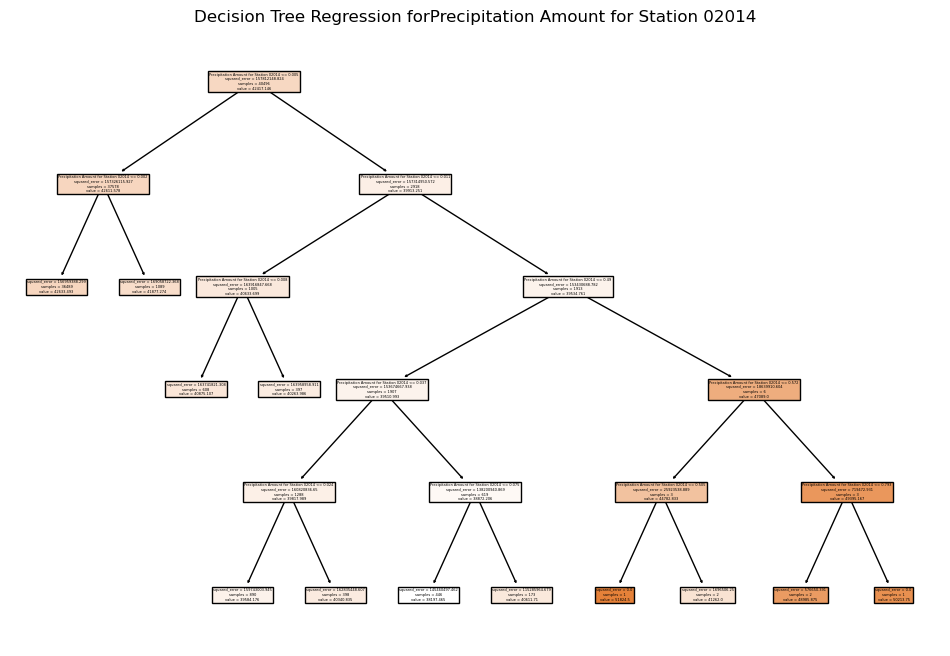

In [15]:

param_grid = {
    'regressor__max_depth': [None, 5, 10, 15, 20]
}

# Create a pipeline
regressor = DecisionTreeRegressor()
pipeline = Pipeline([
    ('regressor', regressor)
])

# reshaping target data to fit regressions requirements
features = energy_consumption_data_train["Energy Consumption"].values.reshape(-1, 1)

#figure_index = 1
for i, column in enumerate(energy_consumption_data_train.columns[0:4]):
    # Fit the linear regression model to the data
    X_TRAIN = energy_consumption_data_train[[column]]
    Y_TRAIN = energy_consumption_data_train["Energy Consumption"]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_TRAIN, Y_TRAIN)

    X_TEST = energy_consumption_data_test[[column]]
    Y_TEST = energy_consumption_data_test["Energy Consumption"]

    best_regressor = grid_search.best_estimator_
    best_regressor.fit(X_TRAIN, Y_TRAIN)
    Y_PRED = best_regressor.predict(X_TEST)

    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score (MSE):", -grid_search.best_score_)
    print("RMSE:", sqrt(-grid_search.best_score_))
    print("r-squared:", r2_score(Y_TEST, Y_PRED))

    # Get the feature names as a list
    feature_names = list(X_TRAIN.columns)

    # Plot the Decision Tree
    plt.figure(figsize=(12, 8))
    plot_tree(best_regressor.named_steps['regressor'], filled=True, feature_names=feature_names)
    plt.title("Decision Tree Regression for " + column)
    plt.show()

## Evaluation with RSME ##